In [3]:
from armageddon import solver
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial
from scipy.interpolate import lagrange
from armageddon import findstrengthradius

##   Extension 1

Here is the brief introduction and several examples for extentsion questions 1.

The function we created in the first place is `create_tabular_density`. The input is a path to the tabular data with `type` : `str`. We simply read the input csv file and split it into two `list` X and Y. Then we define a subsequential function called `tabular_density`, which is used to calculate the density of atomosphere density given different altitude. Finally we take the subsequential function `tabular_density` as the output of the function `create_tabular_density`.

Note that the interpolation strategy we choose is linear interpolation with points in tabular data file.


#### Examples for Extension 1

In [6]:
rhoa = solver.Planet().create_tabular_density('resources/AltitudeDensityTable.csv')

In [7]:
rhoa(4.0600000000000000e+03 )

0.81434604

#### Load data and compare our function values with the actual one

In [8]:
def load_data(file):
    X = []
    Y = []
    data = pd.read_csv(file)
    for i in data[data.keys()[0]]:
        temp = i.split()
        X.append(eval(temp[0]))
        Y.append(eval(temp[1]))
    return X,Y

In [9]:
X,Y = load_data('~/acs-armageddon-Dimorphos/resources/AltitudeDensityTable.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/xq322/acs-armageddon-Dimorphos/resources/AltitudeDensityTable.csv'

NameError: name 'X' is not defined

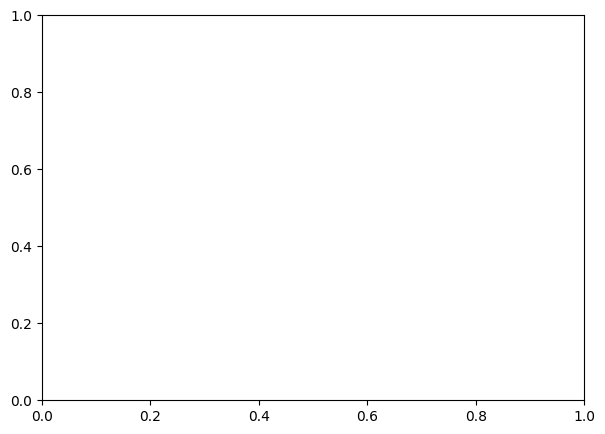

In [10]:
fig, ax1 = plt.subplots(1, 1, figsize=(7, 5))
ax1.plot(X,rhoa(X),label = 'Simulation')
ax1.plot(X,Y, label = 'True')
ax1.grid(True)
ax1.legend(loc='best', fontsize=14)

##   Extension 2

From several observations we can approximately conclude that `radius` influence the scale of maximum air blast energy while `strength ` decides which time point its maximum will be achieved. Hence it is reansonable to only consider the point where `maximum air blast energy` occurs in the graph of `altitude` vs `total energy loss` as a simplification of the curve fitting process.

Consider our curve fitting problem as 
$$
argmin_{r,s} = || f(r,s) - T ||
$$

Where T is a function which returns the acutal point of the maximum energy loss and its corresponding altitude, f is a function returning the point of maximum energy loss and its corresponding altitude in our simulation. Then the distance in two dimensional space defined here is denoted as $$||(x_{0},y_{0}) - (x_{1},y_{1})|| = \sqrt{C\cdot(x_{0} - x_{1})^2 + (y_{0} - y_{1})^2}$$

In general we need to search both parameters such that the error (distance defined above) is set to minimum. By observing multiple plots, we find that for fixed radius $r_{0}$, such that $$error(s) =  || f(r_{0},s) - T || $$ is a convex function with respect to strength. Hence for any strength of our interests, we can always find a optimal radius as $s^{*}$, such that $ s^{*} = g(r)$. Therefore, we simplify the problem as $$argmin_{s} = || f(r,g(r)) - T ||$$

Plot `strength` vs `error` for a fixed `radius`

![ title](e1.1.png)

In fact, this error fucntion is well-defined and convex with radius such that $f$ can also be the form of $$argmin_{r} = || f(g_{1}(s),s) - T ||$$

Plot concerning `radius` and `error`

![ title](e1.2.png)

As mentioned above, since the error function with respect to radius is a convex, we choose golden section search method iteratively to improve efficiency and accuracy.

#### Examples for Extension 2

In [14]:
findstrengthradius(
        density=3300, angle=18.3, velocity=19200,
        data_file='resources/ChelyabinskEnergyAltitude.csv',
        radians=False)

TypeError: Planet.solve_atmospheric_entry_FE() takes 6 positional arguments but 7 were given

#### Load data and compare our function values with the actual one

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


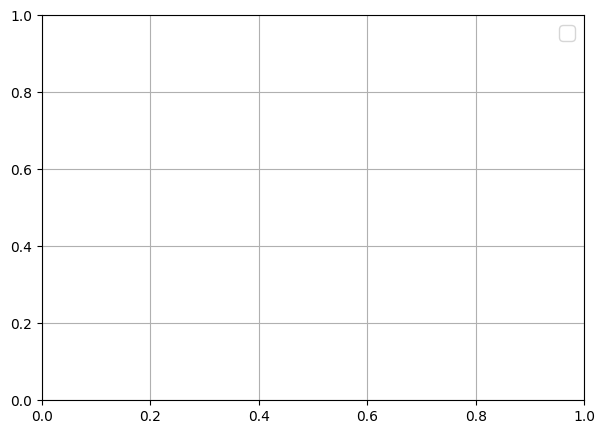

In [13]:
fig, ax1 = plt.subplots(1, 1, figsize=(7, 5))
# ax1.plot(X,rhoa(X),label = 'Simulation')
# ax1.plot(X,Y, label = 'True')
ax1.grid(True)
ax1.legend(loc='best', fontsize=14)